# Initial EDA

Reading in the dataset

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv("../data/airbnb.csv")

In [3]:
listings.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

There were no detailed descriptions given along with the dataset other than for id and log_price. Thus we need to do some EDA to identify the different features.
 We observe that, the following columns need to be changed to the correect data type.
- id to string
- first_review, host_since, last_review to date.
- instant_bookable, host_identity_verified, host_has_profie_pictore to Number encoded values.
- host_response_rate to a numerical column.

Some of the things to check
- Distributions of the variables
- Whether there are duplicates in the zip code
- Clusters in the data
- there are some facilities with the same names and same descriptions. Check what the most common name is.


In [5]:
# Change the features to the correct data type.
listings.id = str(listings.id)


In [6]:
# Check the statistical distribution for Numerical Columns
listings.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
# Check the distribution of Categorical and Text columns
listings.describe(include = ["O"])

,id,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,1,35,3,67122,5,5,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,0 6901257\n1 6304928\n2 ...,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,74111,49003,41310,586,72028,32374,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


In [34]:
listings.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [37]:
lower_dim_categories = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
[listings[c].value_counts() for c in lower_dim_categories]

[Apartment             49003
 House                 16511
 Condominium            2658
 Townhouse              1692
 Loft                   1244
 Other                   607
 Guesthouse              498
 Bed & Breakfast         462
 Bungalow                366
 Villa                   179
 Dorm                    142
 Guest suite             123
 Camper/RV                94
 Timeshare                77
 Cabin                    72
 In-law                   71
 Hostel                   70
 Boutique hotel           69
 Boat                     65
 Serviced apartment       21
 Tent                     18
 Castle                   13
 Vacation home            11
 Yurt                      9
 Hut                       8
 Treehouse                 7
 Chalet                    6
 Earth House               4
 Tipi                      3
 Cave                      2
 Train                     2
 Casa particular           1
 Lighthouse                1
 Parking Space             1
 Island       

## Visualization of target variables

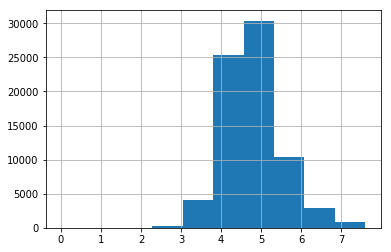

In [42]:
# The Log Price column
listings.log_price.hist()
plt.show()

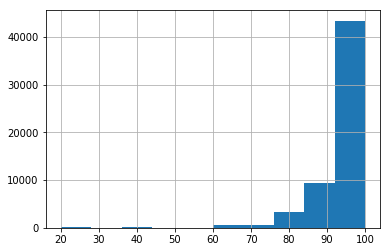

In [46]:
# The review score column
listings.review_scores_rating.hist()
